<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Second order system


## 1  Mecanical system

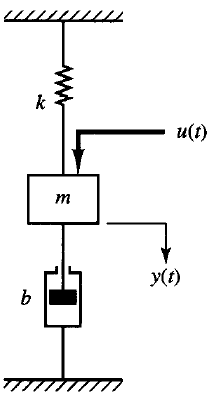

$u(t): input$

$y(t): output$

*Newton law*

$ \ddot{y} = -\frac{b}{m}\dot{y} - \frac{k}{m}y + u$

but

$U(s) = \mathcal{L}(u(t))$ ; $  Y(s) = \mathcal{L}(y(t)) $

$\mathcal{L}(\dot y ) = sY$

$\mathcal{L}(\ddot y ) = s^2Y$, therefore


$ Y s^{2} = -\frac{b}{m}s Y -\frac{k}{m}Y+U$



Transfer function

$ G(s) = \frac{Y(s)}{U(s)} = \frac {1}{ms^2+bs+k}$

Output

$ Y(s) = G(s).U(s) $

back to time:

$y(t) =  \mathcal{L}^{-1}(G(s).U(s))$

In [ ]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
sympy.init_printing()
%matplotlib inline

In [ ]:
m, k, b = sympy.symbols('m,k,b',real=True, positive=True)
t, s = sympy.symbols('t, s')

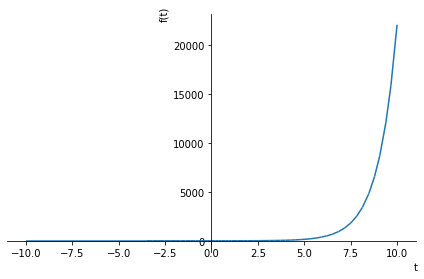

In [ ]:
f = 1/(sympy.exp(-t))
df = sympy.diff(f)
sympy.plot(f)

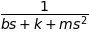

In [ ]:
# trnafer function
G = 1/(k+m*s**2 + b*s )
G

In [ ]:
L    = lambda f: sympy.laplace_transform(f, t, s, noconds=True) 
invL = lambda F: sympy.inverse_laplace_transform(F, s, t)

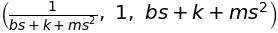

In [ ]:
A = sympy.numer(G)
B = sympy.denom(G)
G,A,B

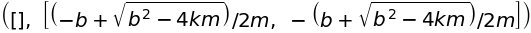

In [ ]:
## roots
z = sympy.solve(A,s)
p = sympy.solve(B,s)
z,p

In [ ]:
def showRoots(z,p):
  plt.title("Complex Roots")
  for i in range(len(z)):
    plt.scatter(sympy.re(z[i]),sympy.im(z[i]), marker='o',color = "blue")
  for i in range(len(p)): 
    plt.scatter(sympy.re(p[i]),sympy.im(p[i]), marker='X', color = "red")
  plt.ylabel("j") 
  plt.xlabel('R')  
  plt.axhline(0, color='black')
  plt.axvline(0, color='black')
  plt.show()

É possível construir a função de transferencia através das raizes e polos:

$G(s) = \frac{k(s-z)}{(s-p_1)(s-p_2)}$

Ganho: 

$ k =5$ 

raiz:

$z = -4$

polos:

$p_1 = 2+3i$

$p_2 = 2-3i$


*utilizando python e sympy*
```
z = 2 + 3*sympy.I
```



*sendo o gráfico das raizes e polos*

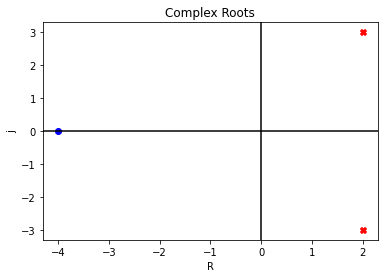


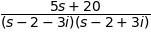

In [ ]:
# A partir dos zeros, polo e ganho, temos
G =  5*(s+4)/((s - 2 + 3*sympy.I)*(s - 2 - 3*sympy.I))
G

## Exemplo numérico

Considere um sistema massa mola com as seguintes caracteristicas:

$ k = 8 N.m $

$ b = 6 N.s  $

$ m = 50 Kg $

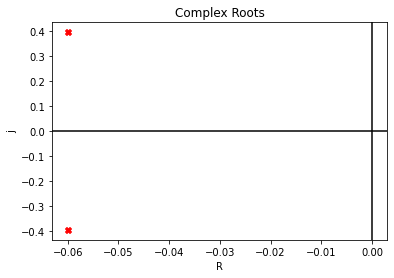

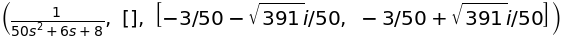

In [ ]:
m = 50
k = 8
b = 6
G = 1/(k+m*s**2 + b*s )
A = sympy.numer(G)
B = sympy.denom(G)
z = sympy.solve(A,s)
p = sympy.solve(B,s)
z,p
showRoots(z,p)
G,z,p

In [ ]:
# Tensão de saida u2 para um impulso unitário
U = 1
y = invL(G*U)
y

É possivel utilizar a biblioteca numpy em associação a sympy, para melhar a representação das funções como segue:


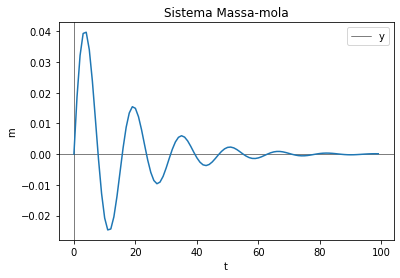

In [ ]:
# Utilizando a biblioteca numpy
t0 = np.linspace(0,100,100)
y = ((391)**.5)*np.exp(-3*t0/50)*np.sin(((391)**.5)*t0/50)/391
plt.title('Sistema Massa-mola' ) 
plt.axhline(y=0, color='black', linewidth=.5)
plt.axvline(x=0, color='black', linewidth=.5) 
plt.xlabel("t"),plt.ylabel("m")
plt.legend(['y'])
plt.plot(y)
plt.show()

## 2 Input

### 2.1 Imput: *Step Unit*

$ u(t) = \theta(t) $ 

$U(s) = 1/s$


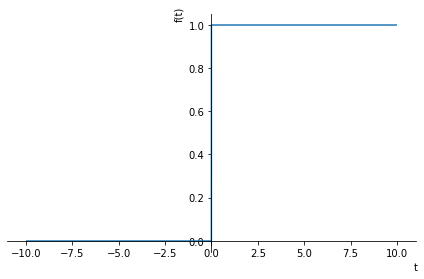

In [ ]:
# Input: 
u = sympy.Heaviside(t)
sympy.plot(u)
U = L(u)
u,U

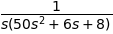

In [ ]:
U = 1/s
Y = G*U
Y

### 2.2 Imput: *impult unit*

$ u(t) = \delta(t) $ 

$U(s) = 1$


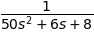

In [ ]:
U = 1
Y = G*U
Y

### 2.3 Input: *ramp*

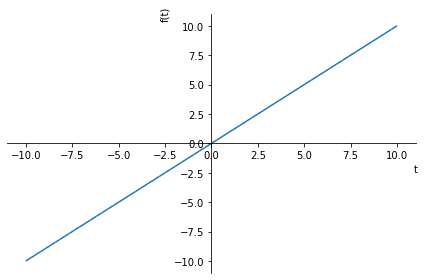

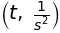

In [ ]:
u = t
U = L(u)
sympy.plot(u)
u,U

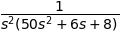

In [ ]:
Y = G*U
Y

## Atividades

Considere sistema massa-mola a seguir, onde 

$ k = 8 N.m $

$ b = 6 N.s  $

$ m = 20 Kg $

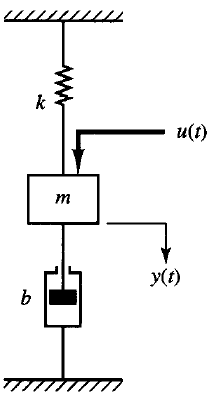

**1.** Mostre os zeros e polos da função de transferencia no plano complexo.

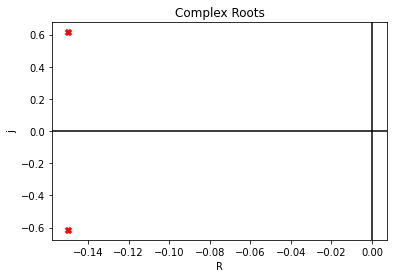

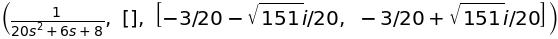

In [ ]:
# coloque seu código aqui
k = 8
b = 6
m = 20
G = 1/(k+m*s**2 + b*s )
A = sympy.numer(G)
B = sympy.denom(G)
z = sympy.solve(A,s)
p = sympy.solve(B,s)
showRoots(z,p)
G,z,p


**2.** Encontre o deslocamento $y(t)$ para uma entrada impulso unitário :



In [ ]:
## coloque seu código aqui
U = 1
y = invL(G*U)
y


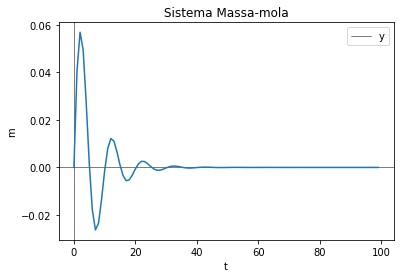

In [ ]:
# coloque seu codigo aqui
t0 = np.linspace(0,100,100)
y = ((151)**.5)*np.exp(-3*t0/20)*np.sin(((151)**.5)*t0/20)/151
plt.title('Sistema Massa-mola' ) 
plt.axhline(y=0, color='black', linewidth=.5)
plt.axvline(x=0, color='black', linewidth=.5) 
plt.xlabel("t"),plt.ylabel("m")
plt.legend(['y'])
plt.plot(y)
plt.show()


*saída esperada*

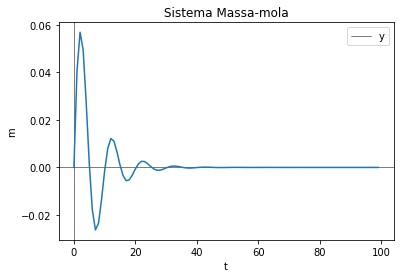

**3**. calcule o valor de  $y(2.5)$ para uma entrada degrau unitário.


In [ ]:
# coloque seu codigo aqui
t0 = 2.5
y = ((151)**.5)*np.exp(-3*t0/20)*np.sin(((151)**.5)*t0/20)/151
y

Resp.: $0.05590m$

**4.** Determine a função de transferências atráves do polos e zeros indicados, considere K = 3.

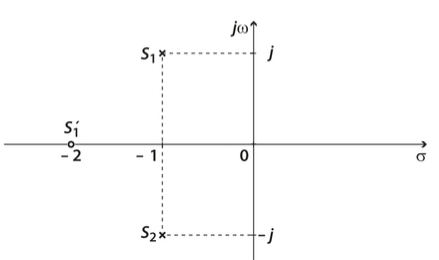

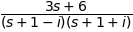

In [ ]:
# coloque seu codigo aqui

#k= 3
#z= -2
#p1= -1+i
#p2= -1-i

G =  3*(s-(-2))/((s - ( -1+ 1*sympy.I))*(s - (-1 - 1*sympy.I)))
G
